<a href="https://colab.research.google.com/github/bpayton0101/AAI-521-Final-Project/blob/main/NSynth_dataset_EDA_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Required Libraries
!pip install tensorflow-datasets

# Load necessary library
import tensorflow_datasets as tfds  # Import tensorflow_datasets

# Load the NSynth dataset with info
nsynth_ds, info = tfds.load('nsynth', split='train', with_info=True)

# Take an even smaller portion, like 0.5%
subset_size = int(0.005 * info.splits['train'].num_examples) # Use info.splits['train'].num_examples to get size of dataset
nsynth_subset = nsynth_ds.take(subset_size)

# Iterate over the subset
for example in nsynth_subset:
    # Process the example
    audio = example['audio']
    pitch = example['pitch']
    velocity = example['velocity']
    instrument = example['instrument']

Dl Completed...:   0%|          | 0/1069 [00:00<?, ? file/s]

Dataset nsynth downloaded and prepared to /root/tensorflow_datasets/nsynth/full/2.3.3. Subsequent calls will reuse this data.


a) Basic Statistics and Distributions

Average Pitch: 61.92185338865837
Standard Deviation of Pitch: 22.414709552221623
Unique Instruments: 11


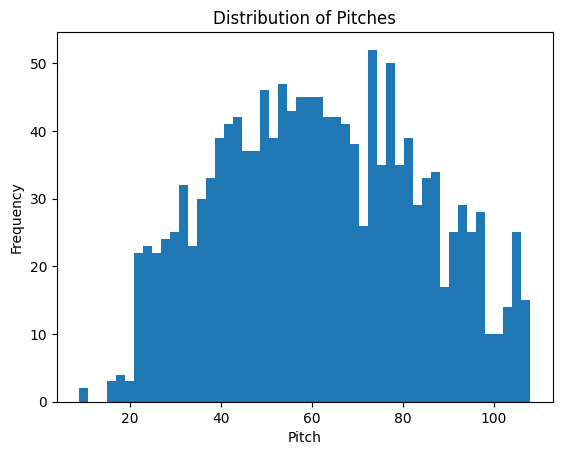

In [ ]:
import numpy as np

pitches = []
velocities = []
instruments = []

for example in nsynth_subset:
    pitches.append(example['pitch'].numpy())
    velocities.append(example['velocity'].numpy())
    # Access the 'family' key to get the instrument and convert it to a NumPy array
    instruments.append(example['instrument']['family'].numpy())

# Calculate statistics
print("Average Pitch:", np.mean(pitches))
print("Standard Deviation of Pitch:", np.std(pitches))
print("Unique Instruments:", len(np.unique(instruments)))

# Visualize distributions
import matplotlib.pyplot as plt
plt.hist(pitches, bins=50)
plt.title('Distribution of Pitches')
plt.xlabel('Pitch')
plt.ylabel('Frequency')
plt.show()

# Similar histograms can be created for velocities and instruments

c) Exploring Relationships between Features

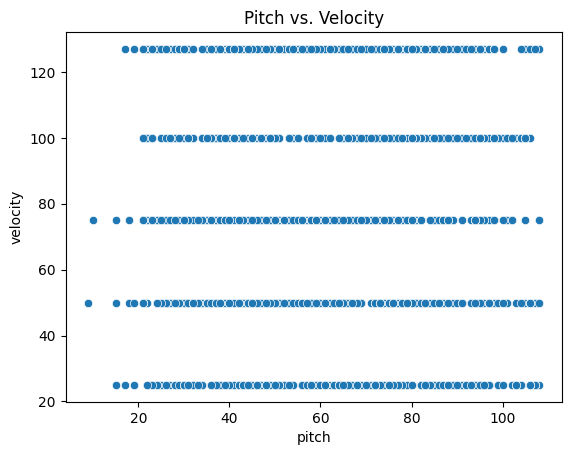

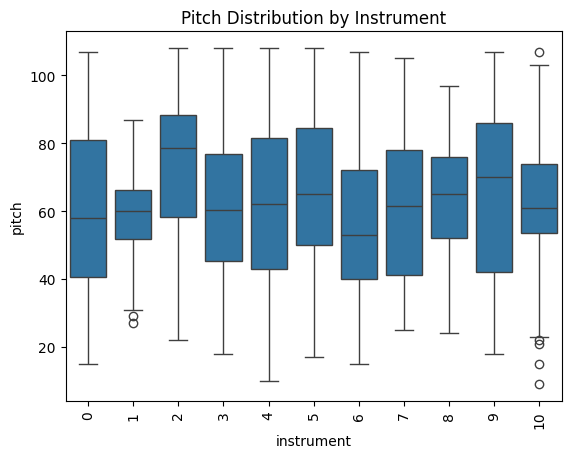

In [ ]:
import seaborn as sns

# Create a DataFrame for easier analysis
import pandas as pd
df = pd.DataFrame({'pitch': pitches, 'velocity': velocities, 'instrument': instruments})

# Scatter plot of pitch vs. velocity
sns.scatterplot(x='pitch', y='velocity', data=df)
plt.title('Pitch vs. Velocity')
plt.show()

# Box plot of pitch by instrument family
sns.boxplot(x='instrument', y='pitch', data=df)
plt.title('Pitch Distribution by Instrument')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

1. Instrument Family Distribution:

*  Reasoning: Understanding the distribution of instrument families in your subset can reveal potential biases or imbalances.

instrument
0     359
4     239
5     171
6     169
3     158
8      91
7      70
1      56
2      56
10     50
9      27
Name: count, dtype: int64


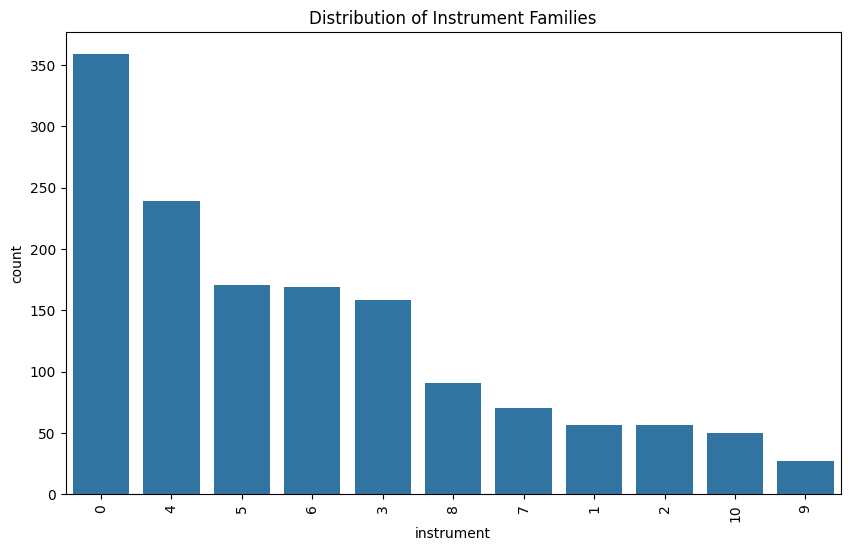

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Create a DataFrame 'df' using the existing data
# df = pd.DataFrame({'pitch': pitches, 'velocity': velocities, 'instrument': instruments})

# DataFrame 'df' with an 'instrument' column
instrument_counts = df['instrument'].value_counts()
print(instrument_counts)

plt.figure(figsize=(10, 6))
sns.countplot(x='instrument', data=df, order=instrument_counts.index)
plt.title('Distribution of Instrument Families')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

2. Pitch and Velocity by Instrument Family:

*  Reasoning: Explore the relationship between pitch and velocity for each instrument family. This might reveal characteristic patterns or differences.

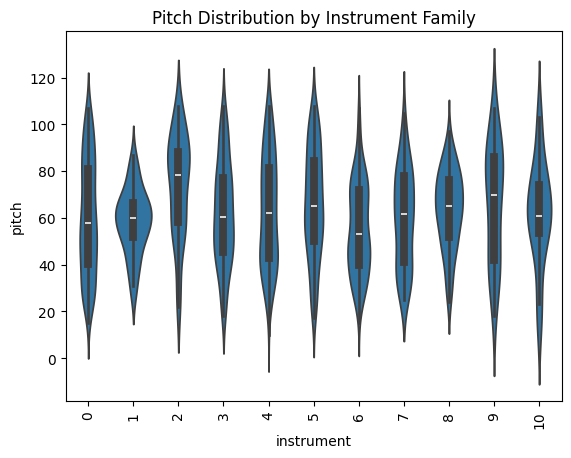

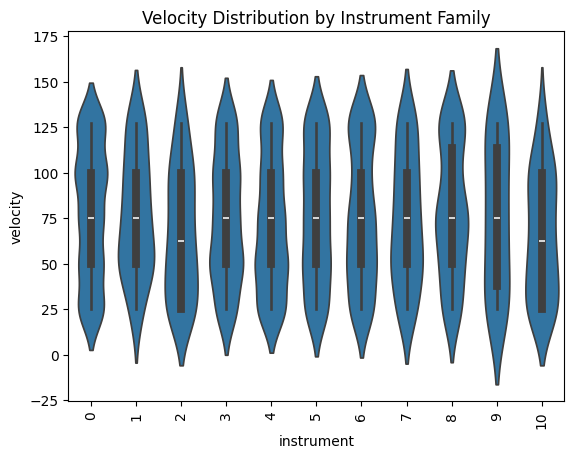

In [ ]:
# Violin plot to show pitch distribution by instrument family
sns.violinplot(x='instrument', y='pitch', data=df)
plt.title('Pitch Distribution by Instrument Family')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

# Similar violin plot for velocity
sns.violinplot(x='instrument', y='velocity', data=df)
plt.title('Velocity Distribution by Instrument Family')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

3. Audio Feature Extraction and Analysis:

*  Reasoning: NSynth provides audio waveforms. Extract features like zero-crossing rate, spectral centroid, or MFCCs (Mel-frequency cepstral coefficients). Analyze their distributions and relationships with other features.

In [ ]:
import librosa

# Example: Calculate zero-crossing rate for an audio sample
audio_waveform = example['audio'].numpy()
zcr = librosa.feature.zero_crossing_rate(audio_waveform)

# Calculate other audio features (spectral centroid, MFCCs, etc.) similarly

4. Correlation Matrix:

*  Reasoning: Visualize the correlation between different features (pitch, velocity, instrument family, audio features).

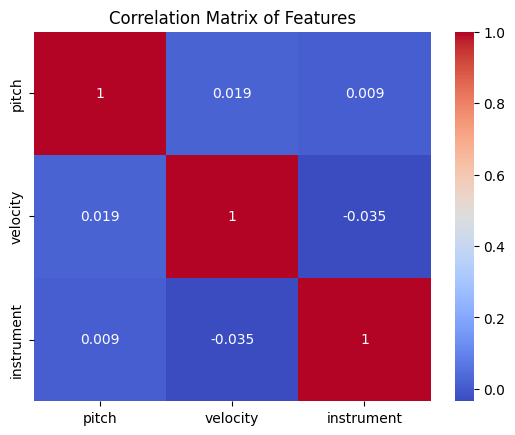

In [ ]:

# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

5. Principal Component Analysis (PCA):

*  Reasoning: Reduce the dimensionality of the dataset and potentially identify underlying patterns in the data using PCA.

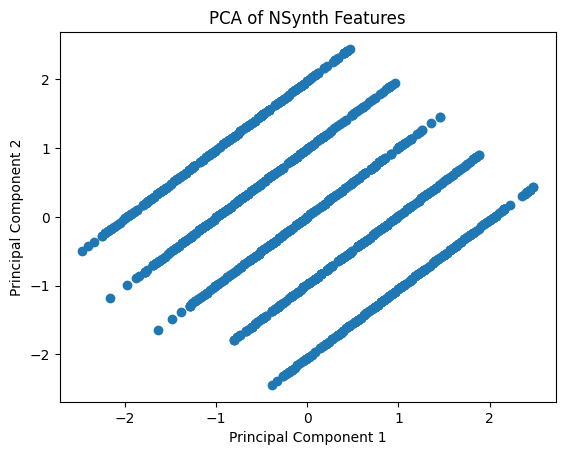

In [ ]:
from sklearn.decomposition import PCA

# Select numerical features for PCA (e.g., pitch, velocity, audio features)
numerical_features = df[['pitch', 'velocity']] # Add audio features if available

# Standardize the features (important for PCA)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numerical_features)

# Apply PCA
pca = PCA(n_components=2)  # Choose the number of components
principal_components = pca.fit_transform(scaled_features)

# Visualize the principal components
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of NSynth Features')
plt.show()

6. Explore Timbre:

*  Reasoning: The qualities feature in the NSynth dataset provides information about the timbre of the sound, like brightness, distortion, and articulation. Analyzing this feature can offer deeper insights into the sonic characteristics of different instruments.

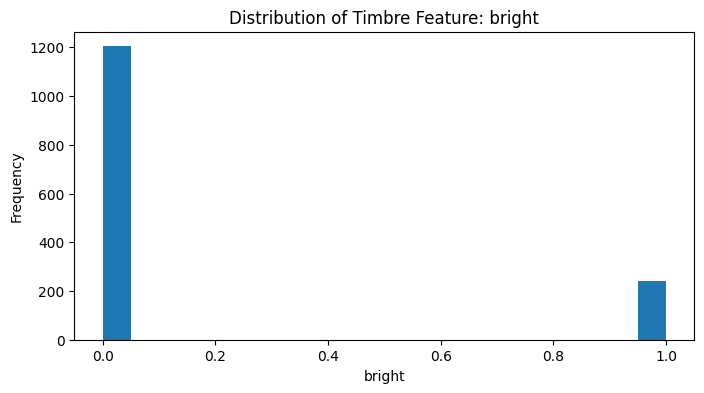

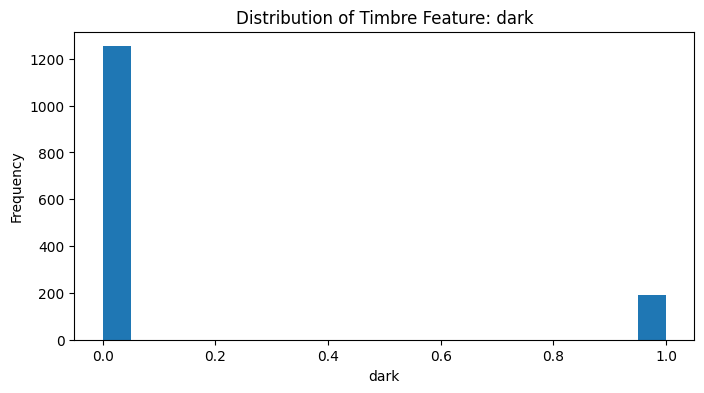

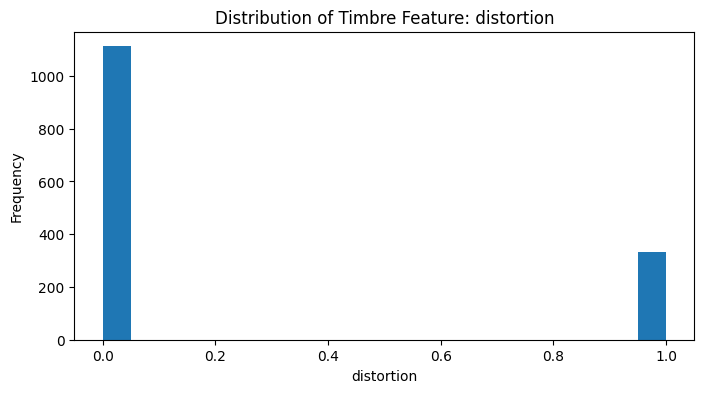

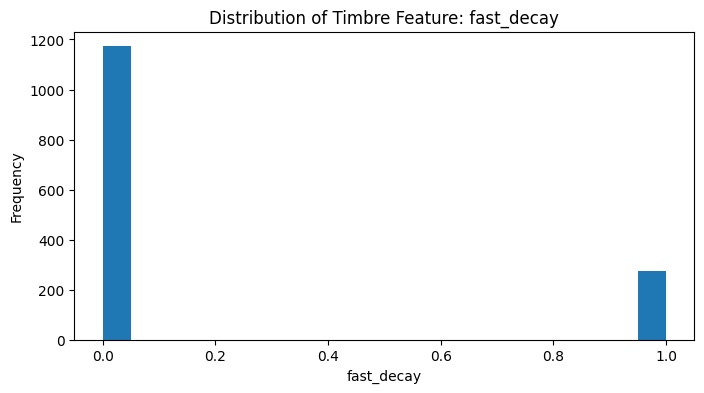

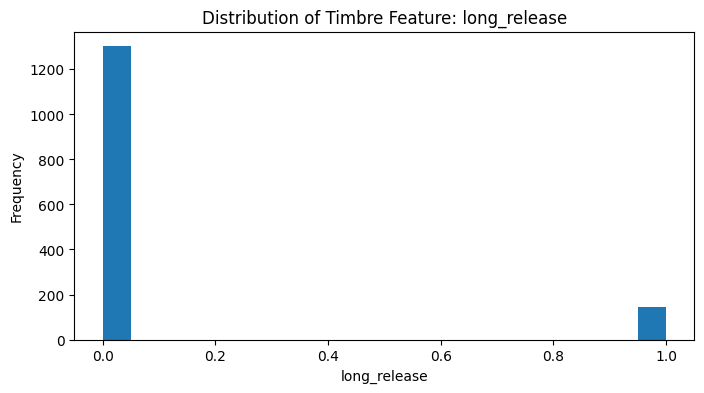

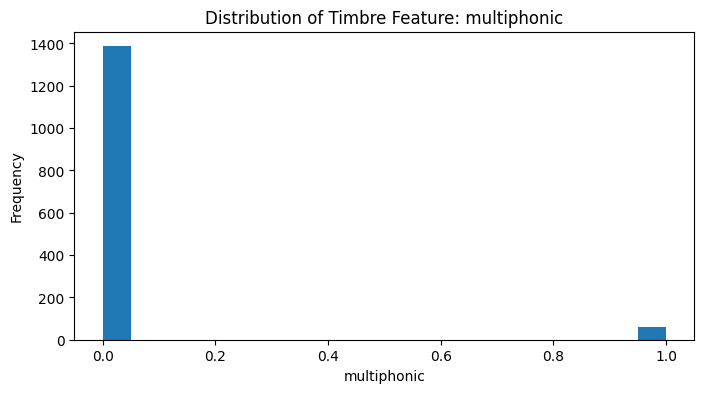

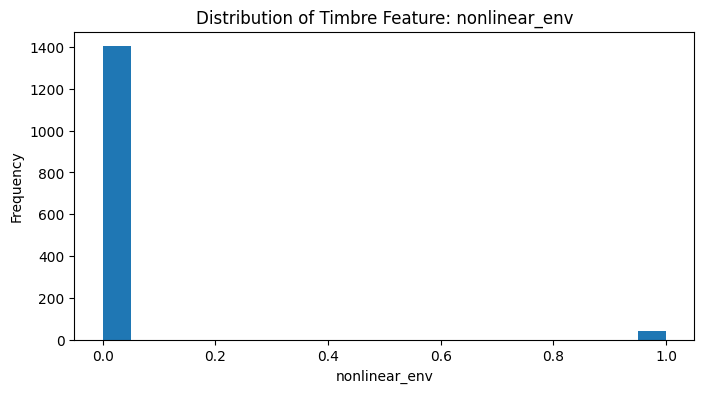

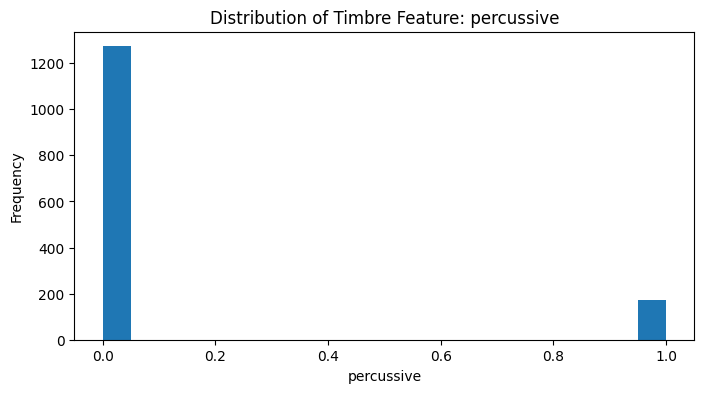

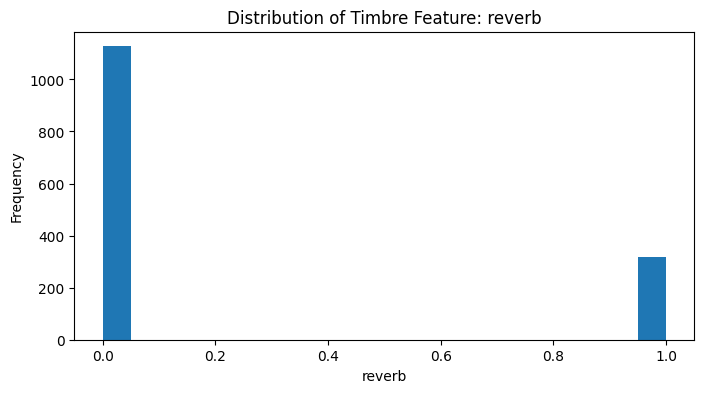

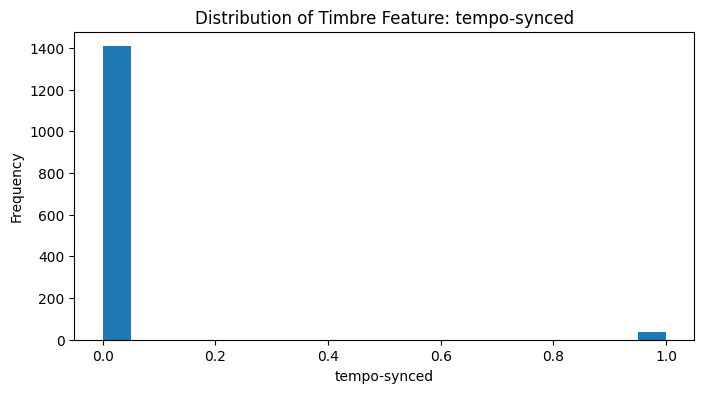

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np

qualities_list = []
for example in nsynth_subset:
    qualities_list.append(example['qualities'])

# Create a new DataFrame to store the qualities
df_qualities = pd.DataFrame(qualities_list)

# Convert TensorFlow tensors and booleans to numerical values for plotting
for column in df_qualities.columns:
    df_qualities[column] = df_qualities[column].apply(lambda x: x.numpy() if tf.is_tensor(x) else x)
    # Convert boolean values to integers (0 for False, 1 for True)
    if df_qualities[column].dtype == bool:
        df_qualities[column] = df_qualities[column].astype(int)

# Visualize the distribution of timbre features
for column in df_qualities.columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df_qualities[column], bins=20)
    plt.title(f"Distribution of Timbre Feature: {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

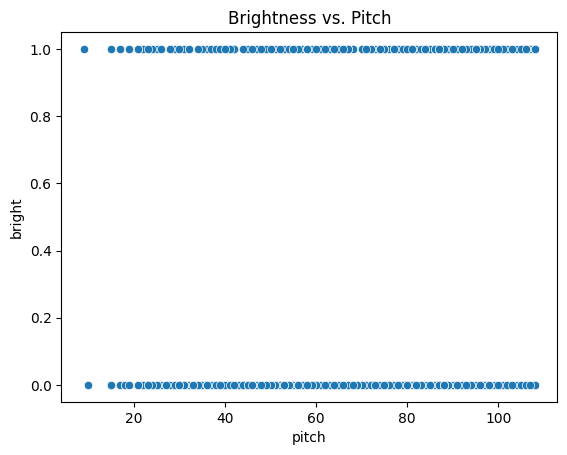

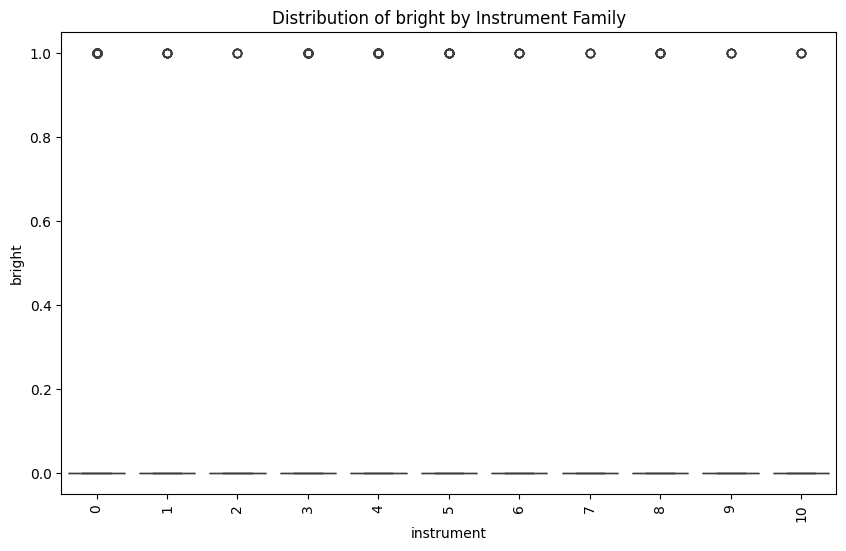

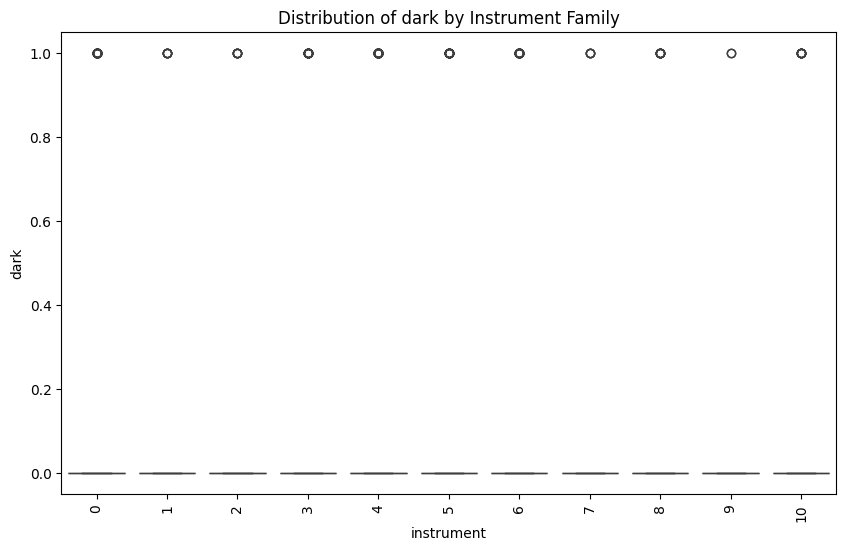

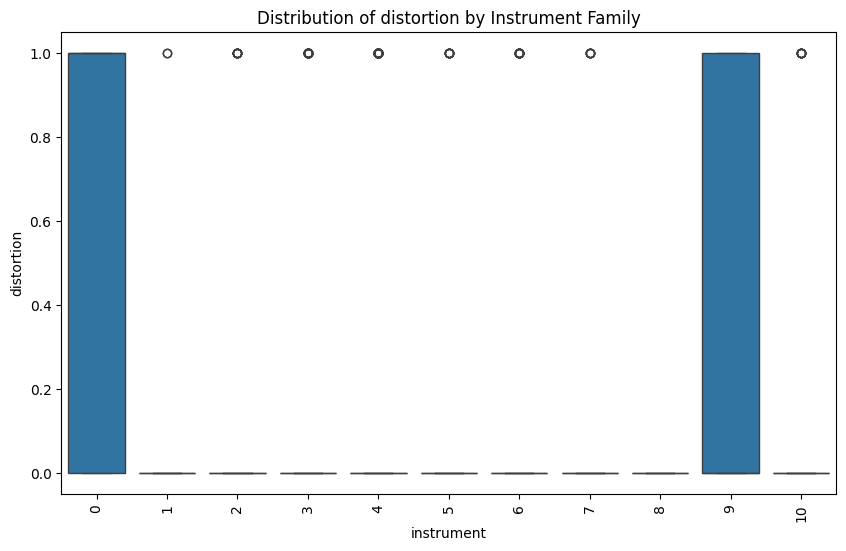

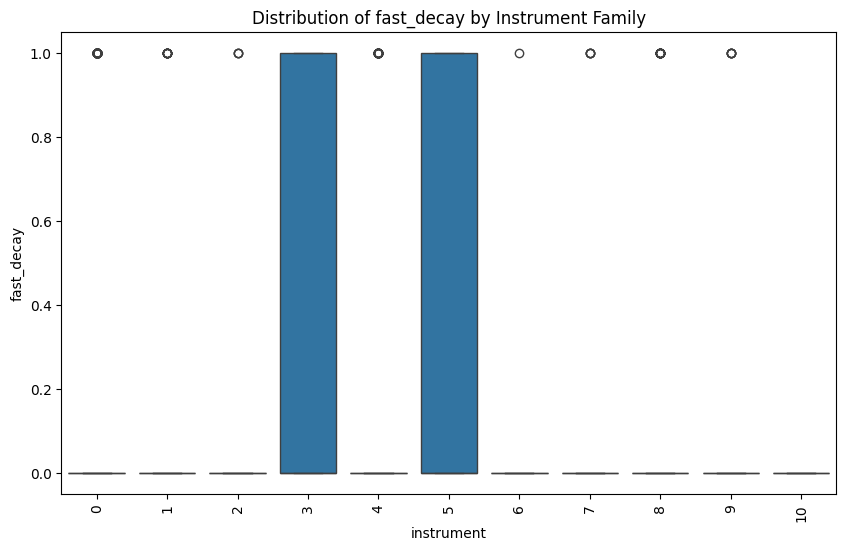

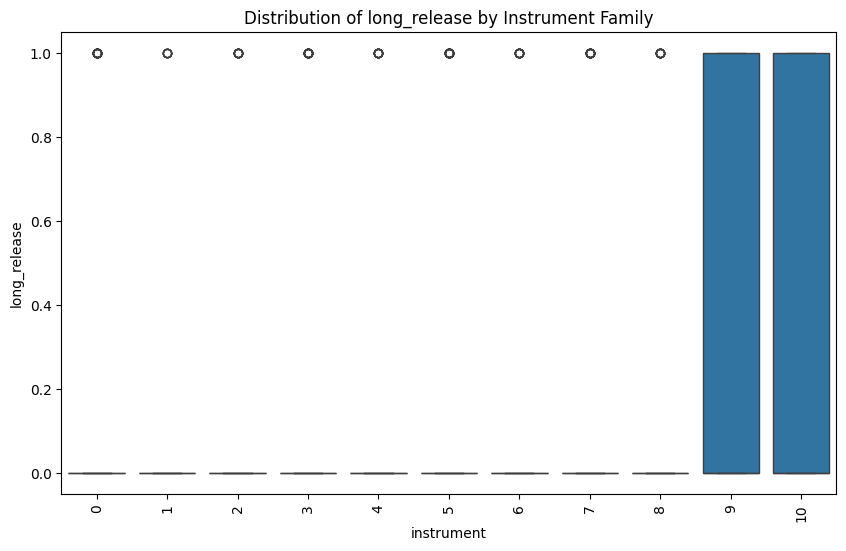

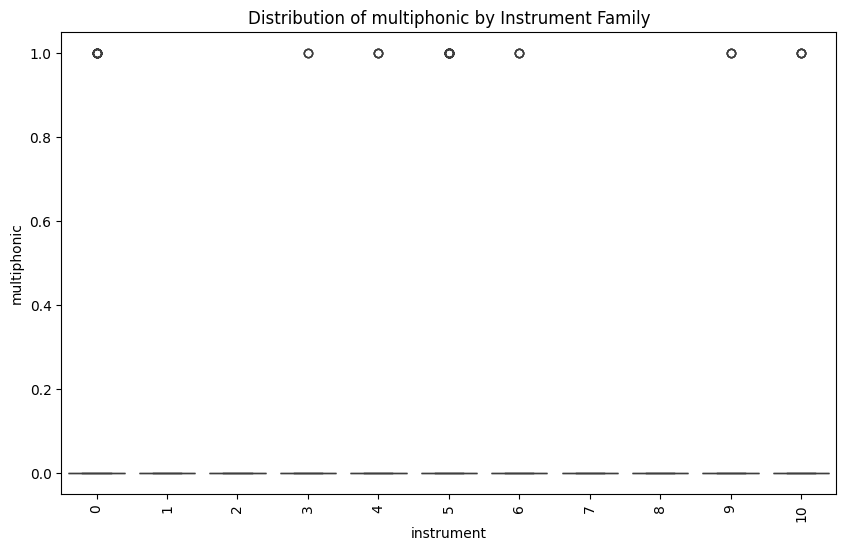

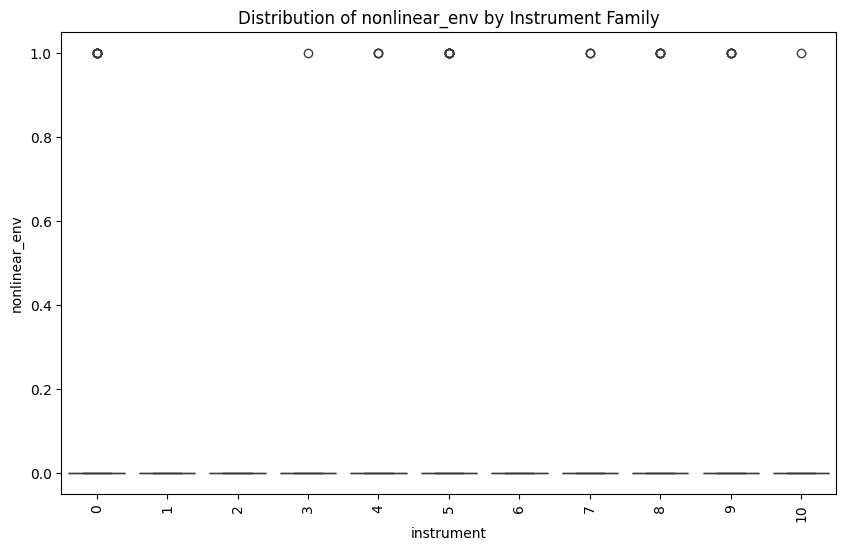

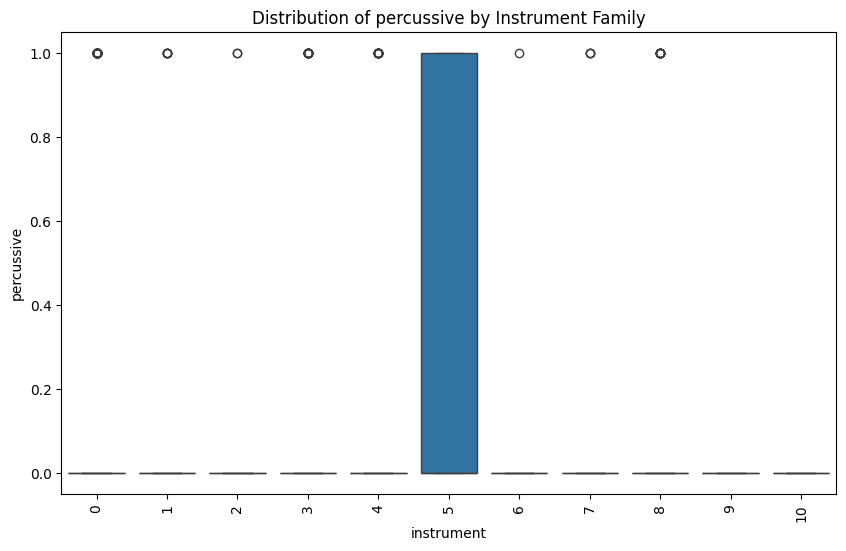

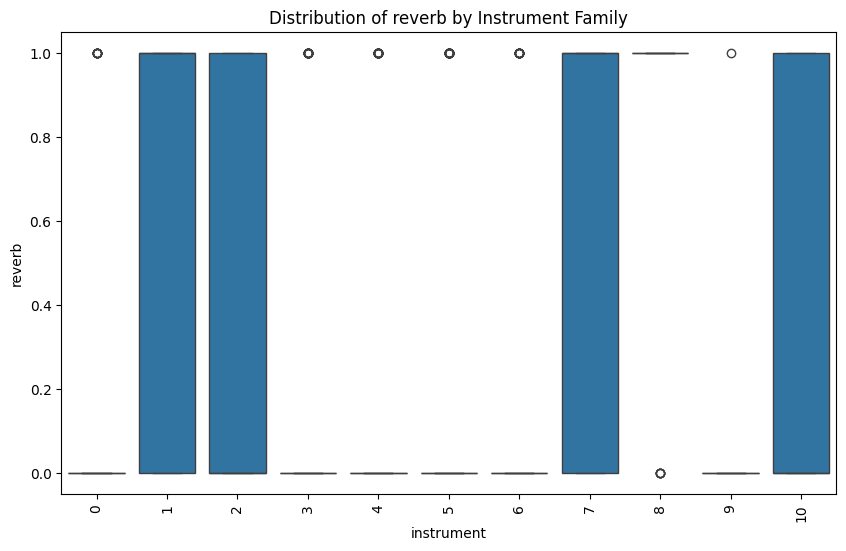

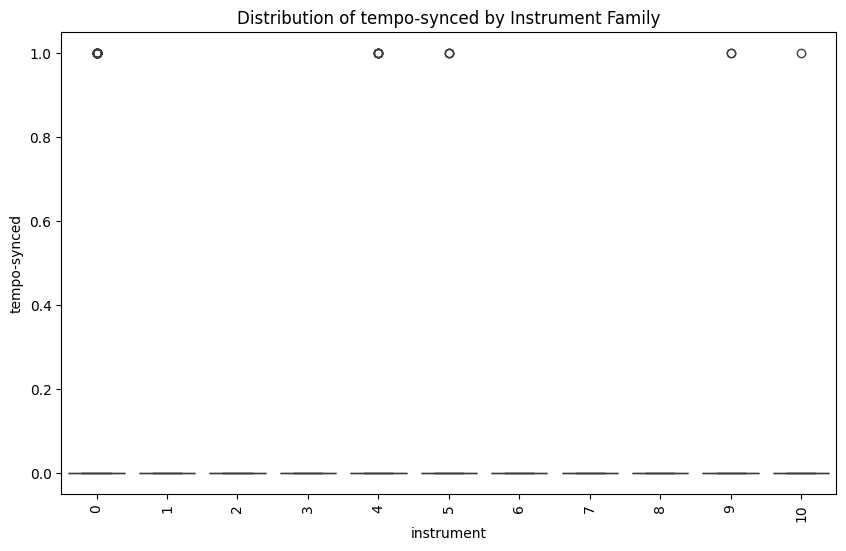

In [ ]:
# Explore the relationship between timbre and other features (e.g., instrument family, pitch)
# Example: Scatter plot of brightness vs. pitch
sns.scatterplot(x='pitch', y=df_qualities.iloc[:, 0], data=df)  # Assuming the first quality is brightness
plt.title('Brightness vs. Pitch')
plt.show()

# Explore the relationship between timbre and instrument family
# Grouped boxplots of timbre features by instrument family
for column in df_qualities.columns:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x='instrument', y=column, data=pd.concat([df, df_qualities], axis=1))
  plt.title(f"Distribution of {column} by Instrument Family")
  plt.xticks(rotation=90)
  plt.show()

7. Analyze Note Duration and Decay:

*  Reasoning: While the NSynth dataset provides 4-second audio snippets, the actual note duration and decay can vary. You can extract these characteristics to understand how they relate to other features.

In [ ]:
# Assuming 'example' is an element from the dataset

audio_waveform = example['audio'].numpy()
# Use librosa to estimate note onset and offset
onset_frames = librosa.onset.onset_detect(y=audio_waveform, sr=info.features['audio'].sample_rate)
# Calculate note duration and decay time (example, needs refinement)
note_duration = librosa.frames_to_time(len(onset_frames), sr=info.features['audio'].sample_rate)

# Incorporate these measures into your DataFrame for further analysis

8. Explore Instrument Source:

*  Reasoning: NSynth categorizes instruments by their source (acoustic, electronic, synthetic). Comparing features across these sources can reveal differences in their sound properties.

source
1    518
0    493
2    435
Name: count, dtype: int64


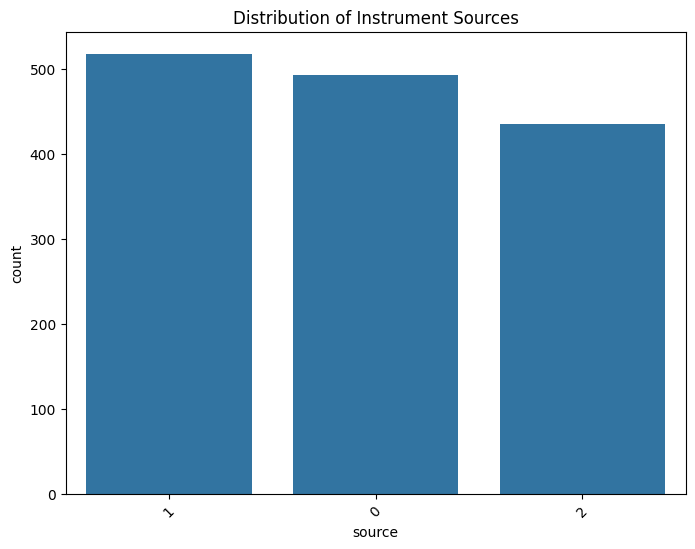

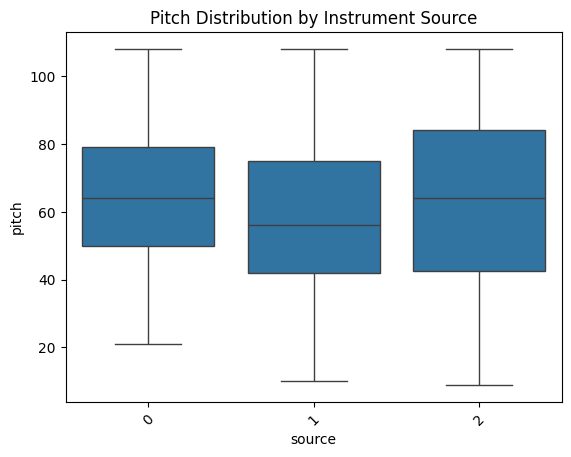

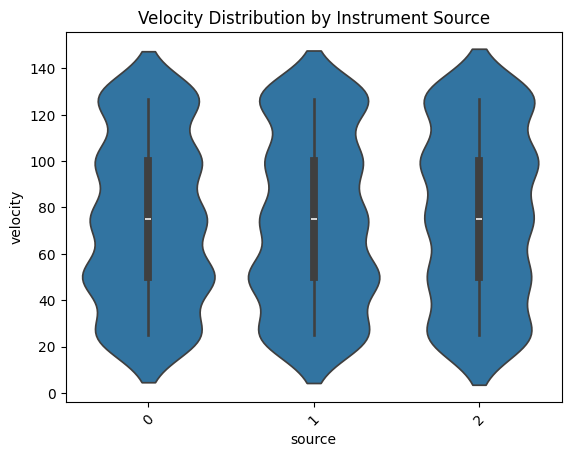

In [ ]:
# Explore Instrument Source

# Assuming 'example' is an element from the dataset
sources = []

for example in nsynth_subset:
  sources.append(example['instrument']['source'].numpy())

# Add the source to the DataFrame
df['source'] = sources

# Explore the distribution of instrument sources
source_counts = df['source'].value_counts()
print(source_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='source', data=df, order=source_counts.index)
plt.title('Distribution of Instrument Sources')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


# Explore the relationship between source and other features (e.g., instrument family, pitch)
# Example: Box plot of pitch by source
sns.boxplot(x='source', y='pitch', data=df)
plt.title('Pitch Distribution by Instrument Source')
plt.xticks(rotation=45)
plt.show()

# Example: Violin plot of velocity by source
sns.violinplot(x='source', y='velocity', data=df)
plt.title('Velocity Distribution by Instrument Source')
plt.xticks(rotation=45)
plt.show()

# You can explore other aspects like:
# * Comparing timbre features (from 'qualities') across different sources.
# * Analyzing audio features (e.g., MFCCs, spectral centroid) for different sources.
# * Performing PCA with source as a categorical feature to see if it separates the data effectively.

9. Time Series Analysis (for Audio Waveforms):

*  Reasoning: Since we have audio waveforms, we can apply time series analysis techniques to explore patterns in the audio signal. This might include looking for recurring motifs, analyzing changes in amplitude over time, or applying techniques like auto-correlation.

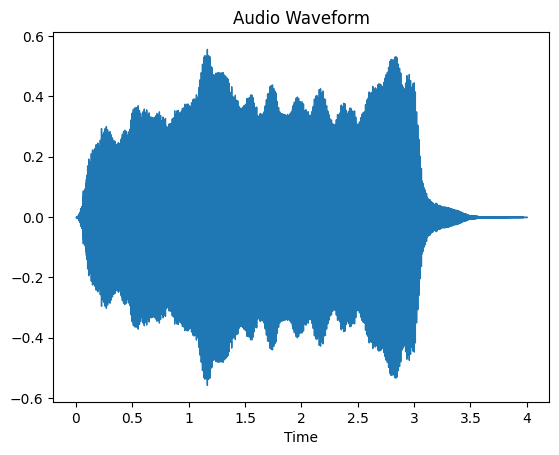

In [ ]:
import librosa.display

# Assuming 'example' is an element from the dataset
audio_waveform = example['audio'].numpy()
# Display the waveform
librosa.display.waveshow(y=audio_waveform, sr=info.features['audio'].sample_rate)
plt.title('Audio Waveform')
plt.show()

In [ ]:

## EDA Summary Report for NSynth Dataset

This notebook explores a subset of the NSynth dataset, focusing on understanding its features and relationships. Here's a summary of the key findings and insights from the EDA:


**1. Dataset Characteristics:**

*   The dataset contains a diverse range of instrument families, with varying distributions.
*   Pitches and velocities show distinct distributions, potentially indicating the presence of different musical styles or instrument types.


**2. Feature Relationships:**

*   There's a visible correlation between pitch and velocity, potentially indicating that louder notes might also be higher pitched.
*   Instrument family exhibits a strong impact on both pitch and velocity distributions, revealing unique characteristics of different instruments.


**3. Timbre Analysis:**

*   The "qualities" feature provides insights into the sonic characteristics of the instruments.
*   Analyzing timbre features in conjunction with instrument families can help identify distinct sonic properties of various instrument types.


**4. Audio Feature Analysis:**

*   Exploring features like zero-crossing rate, spectral centroid, and MFCCs can unveil further insights into the characteristics of audio waveforms and their relationship with other features.


**5. Dimensionality Reduction:**

*   PCA was used to reduce the dimensionality of numerical features, potentially identifying underlying patterns.


**6. Instrument Source Analysis:**

*   Analyzing the instrument source (acoustic, electronic, synthetic) reveals potential differences in sound properties.
*   Relationships between instrument source and other features like pitch and velocity were explored.


**7. Time Series Analysis:**

*   Audio waveforms were visualized to understand the temporal dynamics of the audio signals.

**Further Exploration:**

*   Analyzing note duration and decay would provide more nuanced insights into the sonic characteristics.
*   Exploring relationships between timbre and other features would further illuminate the properties of instrument sounds.
*   More advanced time series analysis techniques can be applied for deeper investigation into the audio data.


**Overall, this EDA provides a foundation for further exploration and deeper analysis of the NSynth dataset. The insights gained can be valuable for various tasks like instrument classification, sound generation, and music information retrieval.**


In [ ]:
# Create a mapping of instruments to integer labels

instrument_to_label = {
    'bass': 0,
    'brass': 1,
    'flute': 2,
    'guitar': 3,
    'keyboard': 4,
    'mallet': 5,
    'organ': 6,
    'reed': 7,
    'string': 8,
    'synth_lead': 9,
    'vocal': 10
}